# Terry Stops

### Project By: Wambui Kamotho
### Date: 19/02/2025
### Data Science: Fulltime Remote

## Introduction

### Terry vs Ohio
#### Real-world problem: 
Terry stops are named after the 1968 Supreme Court decision Terry v. Ohio. They involve the temporary detention of a person based on a reasonable suspicion of criminal activity. The goal of this project is to create and train a predictive model, based on a dataset of Seattle Terry Stops data.
#### Stakeholders: 
This model would be used mainly by law enforcement agencies, but also legal assistance organizations, law firms, and district attorneys


## Data understanding

#### Source
- This data is made available by the City of Seattle. It was recorded by Police of stops they made.
- Each record contains perceived demographics of the subject, as reported by the officer making the stop and officer demographics as reported to the Seattle Police Department, for employment purposes.


## Data Preparation

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Terry_stops.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62737 entries, 0 to 62736
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         62737 non-null  object
 1   Subject ID                62737 non-null  int64 
 2   GO / SC Num               62737 non-null  int64 
 3   Terry Stop ID             62737 non-null  int64 
 4   Stop Resolution           62737 non-null  object
 5   Weapon Type               62737 non-null  object
 6   Officer ID                62737 non-null  object
 7   Officer YOB               62737 non-null  int64 
 8   Officer Gender            62737 non-null  object
 9   Officer Race              62737 non-null  object
 10  Subject Perceived Race    62737 non-null  object
 11  Subject Perceived Gender  62737 non-null  object
 12  Reported Date             62737 non-null  object
 13  Reported Time             62737 non-null  object
 14  Initial Call Type     

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,18 - 25,-1,20170000378736,317787,Offense Report,None,6953,1968,M,White,...,21:02:00.0000000,"CHILD - CRITICAL ABAND, ABUSE, MOLEST, NEGLECT","CHILD - ABANDONED, ABUSED AND NEGLECTED",911,NORTH PCT 2ND W - NORA (JOHN) - PLATOON 1,N,N,North,N,N3
1,46 - 55,-1,20160000000783,130754,Field Contact,None,6799,1976,M,Hispanic,...,11:56:00.0000000,-,-,-,WEST PCT 2ND W - SPECIAL BEATS,N,N,East,C,C3
2,46 - 55,7725465933,20220000032252,31547787060,Arrest,-,7596,1971,M,White,...,12:41:32.0000000,SHOPLIFT - THEFT,SHOPLIFT - THEFT,ONVIEW,WEST PCT 2ND W - SPECIAL BEATS,Y,N,West,M,M2
3,36 - 45,-1,20160000001344,140768,Field Contact,None,5717,1968,M,White,...,17:43:00.0000000,-,-,-,NORTH PCT 2ND W - BOY (JOHN) - PLATOON 1,N,N,-,-,-
4,18 - 25,7725775096,20200000247342,15050362499,Field Contact,-,6913,1979,M,White,...,22:15:01.0000000,ASLT - PERSON SHOT OR SHOT AT,BURGLARY - UNOCC STRUC ON RESN PROP,911,SOUTHWEST PCT OPS - NIGHT ACT,N,Y,Southwest,W,W2


## Exploring the data

For the model we are trying to create, the columns containing identification information are not going to be of use to us- so we are going to disregard those

The Officer age infomation is given through the year of birth, I converted it into age, and then grouped it into groups in order to make the data categorical

For most of the missing data, I put into categories denoting that it was not included.

In [3]:
df["Officer YOB"].describe()

count    62737.000000
mean      1984.239301
std          9.462633
min       1900.000000
25%       1979.000000
50%       1986.000000
75%       1991.000000
max       2002.000000
Name: Officer YOB, dtype: float64

In [4]:
def categorize_age_group(year_of_birth):
    current_year = 2017 #This is the year the data was created 
    age = current_year - year_of_birth

    # Categorize the age into 10-year age groups
    
    if 10 <= age < 20:
        return "10-19"
    if 20 <= age < 30:
        return "20-29"
    elif 30 <= age < 40:
        return "30-39"
    elif 40 <= age < 50:
        return "40-49"
    else:
        return "50+"
    
df["Officer YOB"]=df["Officer YOB"].map(categorize_age_group)

In [5]:
df.isna().sum()

Subject Age Group             0
Subject ID                    0
GO / SC Num                   0
Terry Stop ID                 0
Stop Resolution               0
Weapon Type                   0
Officer ID                    0
Officer YOB                   0
Officer Gender                0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender      0
Reported Date                 0
Reported Time                 0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad               559
Arrest Flag                   0
Frisk Flag                    0
Precinct                      0
Sector                        0
Beat                          0
dtype: int64

In [6]:
df["Officer Squad"].value_counts()

TRAINING - FIELD TRAINING SQUAD            6668
WEST PCT 1ST W - DAVID - PLATOON 1         1706
WEST PCT 3RD W - KING - PLATOON 1          1433
WEST PCT 1ST W - KING - PLATOON 1          1314
SOUTHWEST PCT 2ND W - FRANK - PLATOON 2    1287
                                           ... 
ZOLD CRIME ANALYSIS UNIT - ANALYSTS           1
SOUTHWEST PCT 1ST W - WILLIAM                 1
HOMICIDE SQUAD A                              1
TRAF - MOTORCYCLE UNIT - T2 SQUAD             1
WEST PCT - ITRU SQUAD                         1
Name: Officer Squad, Length: 276, dtype: int64

In [7]:
df["Officer Squad"].fillna("Missing", inplace=True)
df.isna().sum()

Subject Age Group           0
Subject ID                  0
GO / SC Num                 0
Terry Stop ID               0
Stop Resolution             0
Weapon Type                 0
Officer ID                  0
Officer YOB                 0
Officer Gender              0
Officer Race                0
Subject Perceived Race      0
Subject Perceived Gender    0
Reported Date               0
Reported Time               0
Initial Call Type           0
Final Call Type             0
Call Type                   0
Officer Squad               0
Arrest Flag                 0
Frisk Flag                  0
Precinct                    0
Sector                      0
Beat                        0
dtype: int64

### Analyze the target variable

The variable we are trying to predict is whether an arrest will or will not occur. 

In [8]:
df["Arrest Flag"].value_counts()

N    55802
Y     6935
Name: Arrest Flag, dtype: int64

<AxesSubplot:xlabel='Arrest Flag', ylabel='count'>

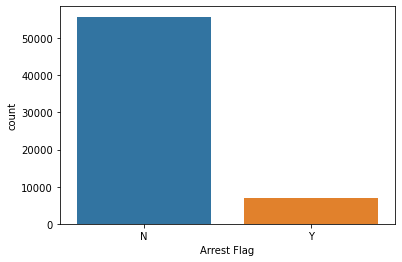

In [9]:
sns.countplot(data=df, x='Arrest Flag')

#### Examine Features

In [10]:
df["Stop Resolution"].value_counts()

Field Contact               30781
Offense Report              15863
Arrest                      15143
Referred for Prosecution      728
Citation / Infraction         222
Name: Stop Resolution, dtype: int64

<AxesSubplot:xlabel='Stop Resolution', ylabel='count'>

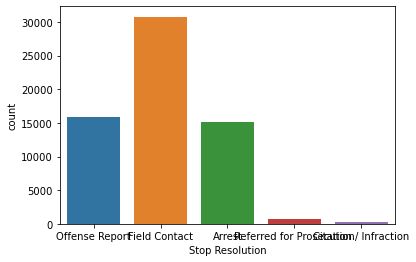

In [11]:
sns.countplot(data=df, x='Stop Resolution')

In [12]:
counts = (df[['Arrest Flag', 'Stop Resolution']]
              .groupby(['Arrest Flag', 'Stop Resolution'])
              .size()
              .unstack('Arrest Flag')
         )
counts


Arrest Flag,N,Y
Stop Resolution,,
Arrest,8210.0,6933.0
Citation / Infraction,222.0,NaN
Field Contact,30781.0,NaN
Offense Report,15863.0,NaN
Referred for Prosecution,726.0,2.0


In [13]:
"""
This column shows that the stops have more resolutions than just arrest, 
while this is interesting, it is not relevant to the model.
"""

'\nThis column shows that the stops have more resolutions than just arrest, \nwhile this is interesting, it is not relevant to the model.\n'

In [14]:
df["Arrested"]= df["Stop Resolution"]

In [15]:
counts = (df[['Frisk Flag', 'Arrest Flag']]
              .groupby(['Frisk Flag', 'Arrest Flag'])
              .size()
              .unstack('Frisk Flag')
         )
counts

Frisk Flag,-,N,Y
Arrest Flag,,,
N,478.0,42791.0,12533.0
Y,NaN,4359.0,2576.0


<AxesSubplot:xlabel='Subject Perceived Race', ylabel='count'>

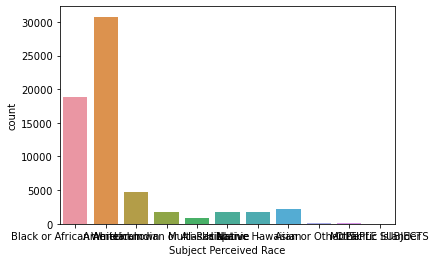

In [16]:
sns.countplot(data=df, x='Subject Perceived Race')

In [17]:
df["Subject Perceived Race"].value_counts()

White                                        30767
Black or African American                    18808
Unknown                                       4655
Asian                                         2162
-                                             1821
American Indian or Alaska Native              1708
Hispanic                                      1684
Multi-Racial                                   809
Native Hawaiian or Other Pacific Islander      170
Other                                          152
MULTIPLE SUBJECTS                                1
Name: Subject Perceived Race, dtype: int64

In [18]:
df["Call Type"].value_counts()

911                              29558
ONVIEW                           14856
-                                13543
TELEPHONE OTHER, NOT 911          4213
ALARM CALL (NOT POLICE ALARM)      535
TEXT MESSAGE                        30
HISTORY CALL (RETRO)                 1
SCHEDULED EVENT (RECURRING)          1
Name: Call Type, dtype: int64

In [19]:
df["Initial Call Type"].value_counts()

-                                             13543
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW     5003
SUSPICIOUS PERSON, VEHICLE, OR INCIDENT        4347
DISTURBANCE                                    3170
ASLT - CRITICAL (NO SHOOTINGS)                 2764
                                              ...  
INFORMATIONAL BROADCASTS                          1
PREPLANNED EVENT                                  1
SEX OFFENDER - FAILURE TO REGISTER                1
ASSIGNED DUTY - STAKEOUT                          1
REQUEST TO WATCH                                  1
Name: Initial Call Type, Length: 184, dtype: int64

In [20]:
df["Final Call Type"].value_counts()

-                                                     13543
SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON                 5856
PROWLER - TRESPASS                                     4457
DISTURBANCE - OTHER                                    3735
ASSAULTS, OTHER                                        3134
                                                      ...  
COMMERCIAL SEXUAL EXPLOITATION OF MINORS (CSEC)           1
OBS WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/DIST)        1
ALARM-VEHICLE ALARMS                                      1
PEDESTRIAN VIOLATIONS                                     1
OBS - MVC - NON INJURY, BLOCKING                          1
Name: Final Call Type, Length: 198, dtype: int64

### Selected features

For the model, I did not use any 
- ID numbers, whether of the situation or persons, I disregarded location
- Call resolution- because that information is not abailable until after the stop.
- Location- because my main focus, especially considering details of the case is demographical features and not topological ones.

In [21]:
X=df[['Subject Age Group','Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Call Type']]
X=pd.get_dummies(X, dtype=int) # One Hot Encoding data to make it binary
X.head()

,Subject Age Group_-,Subject Age Group_1 - 17,Subject Age Group_18 - 25,Subject Age Group_26 - 35,Subject Age Group_36 - 45,Subject Age Group_46 - 55,Subject Age Group_56 and Above,Officer YOB_10-19,Officer YOB_20-29,Officer YOB_30-39,...,Subject Perceived Gender_Unable to Determine,Subject Perceived Gender_Unknown,Call Type_-,Call Type_911,Call Type_ALARM CALL (NOT POLICE ALARM),Call Type_HISTORY CALL (RETRO),Call Type_ONVIEW,Call Type_SCHEDULED EVENT (RECURRING),"Call Type_TELEPHONE OTHER, NOT 911",Call Type_TEXT MESSAGE
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [22]:
y= df["Arrest Flag"].replace({'N': 0, 'Y': 1}) # Making the target variable binary
y.head() 

0    0
1    0
2    1
3    0
4    0
Name: Arrest Flag, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
# importing from scikit library 

In [24]:
#Spliting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=10)
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (50189, 50)
Testing Set Shape: (12548, 50)


In [25]:
# There is a class imbalance in the data. SMOTE shall be used to adress it
# For a basic model, decision tree classifier is chosen
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Verify class distribution after SMOTE
print("Class Distribution After SMOTE:\n", y_train_sm.value_counts())

Class Distribution After SMOTE:
 1    44658
0    44658
Name: Arrest Flag, dtype: int64


In [26]:
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train_sm, y_train_sm) 

DecisionTreeClassifier(random_state=10)

In [27]:
# Use the trained model to make a prediction.
y_pred = classifier.predict(X_test)  

In [28]:
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report

### Calculate performance measures

In [29]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.628089061506147

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.65      0.77     11144
           1       0.18      0.60      0.28      1404

    accuracy                           0.65     12548
   macro avg       0.55      0.63      0.52     12548
weighted avg       0.85      0.65      0.71     12548



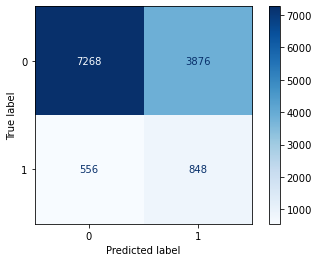

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)

### Interpret classification metrics

An AUC score of 0.628 means that we have created a fair model, ther is room for improvement- but it is better than random classification. 

However, the F1 score is indicating a poor model. it shows that there is a significant imbalance in precision and recall. 

The classification matrix shows that the model missclassified a lot of the testing data. This is an indication of a poor model that should not be used for real life applications

In [33]:
# Hypertuning the classifier
max_depths = list(range(1, 31))
roc_auc_results = []


for max_depth in max_depths:
    classifier = DecisionTreeClassifier(max_depth=max_depth, 
                                      random_state=45)
    classifier.fit(X_train_sm, y_train_sm)
    y_pred = classifier.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    roc_auc_results.append(roc_auc)

best_max_depth= roc_auc_results.index(max(roc_auc_results))

In [34]:
min_samples_splits = np.arange(2, 11)
roc_auc_results

for min_samples_split in min_samples_splits:
    classifier = DecisionTreeClassifier(min_samples_split=int(min_samples_split),
                                      random_state=45)
    classifier.fit(X_train_sm, y_train_sm)
    y_pred = classifier.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    roc_auc_results.append(roc_auc)
    
best_min_splits= roc_auc_results.index(max(roc_auc_results))


In [35]:
best_min_splits

8

In [36]:
classifier = DecisionTreeClassifier(min_samples_split=best_min_splits, max_depth=best_max_depth, random_state=45)
classifier.fit(X_train_sm, y_train_sm)
y_pred = classifier.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6401842852847878

The resulting model is not much better than the one without hypertuning. There is a 0.02 difference in the AUC scores. 

## Conclusion
This project developed a Decision tree Classifier model that could predict arrests at Terry stops.


#### Considering other models
- This model does not appear to be working well with the data we have. The performance metrics were poor overall and did not indicate a usable model

#### Adding more predictive features
- including features that were left out in this model like- location and time might help make a better model. Other features which are not in the data like beahavior of subject or hours on duty of officer may result in a more robust model